In [1]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
path = kagglehub.dataset_download('sakshigoyal7/credit-card-customers') + '/BankChurners.csv'
customer = pd.read_csv(path)

In [3]:
customer.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [4]:
customer = customer.drop(customer.columns[-2:], axis=1)
customer = customer[customer.Attrition_Flag == 'Existing Customer']

In [5]:
numerical_features = [
    'Customer_Age', 
    'Dependent_count', 
    'Months_on_book', 
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal', 
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

customer[numerical_features].describe().round(1)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0,8500.0
mean,46.3,2.3,35.9,3.9,2.3,2.4,8726.9,1256.6,7470.3,0.8,4654.7,68.7,0.7,0.3
std,8.1,1.3,8.0,1.5,1.0,1.1,9085.0,757.7,9087.7,0.2,3512.8,22.9,0.2,0.3
min,26.0,0.0,13.0,1.0,0.0,0.0,1438.3,0.0,15.0,0.3,816.0,11.0,0.0,0.0
25%,41.0,1.0,31.0,3.0,1.0,2.0,2602.0,800.0,1184.5,0.6,2384.8,54.0,0.6,0.1
50%,46.0,2.0,36.0,4.0,2.0,2.0,4643.5,1364.0,3469.5,0.7,4100.0,71.0,0.7,0.2
75%,52.0,3.0,40.0,5.0,3.0,3.0,11252.8,1807.0,9978.2,0.9,4781.2,82.0,0.8,0.5
max,73.0,5.0,56.0,6.0,6.0,5.0,34516.0,2517.0,34516.0,3.4,18484.0,139.0,3.7,1.0


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

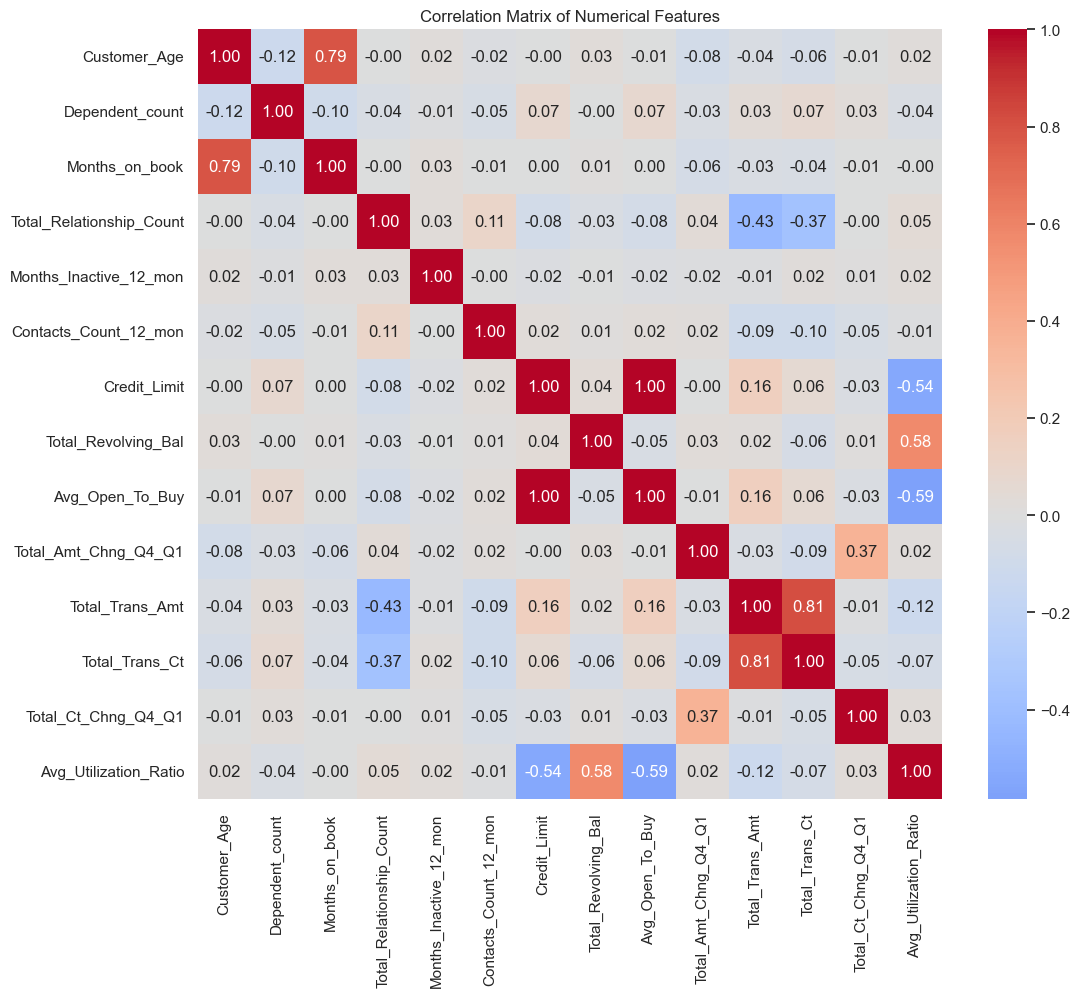

In [6]:
corr_matrix = customer[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

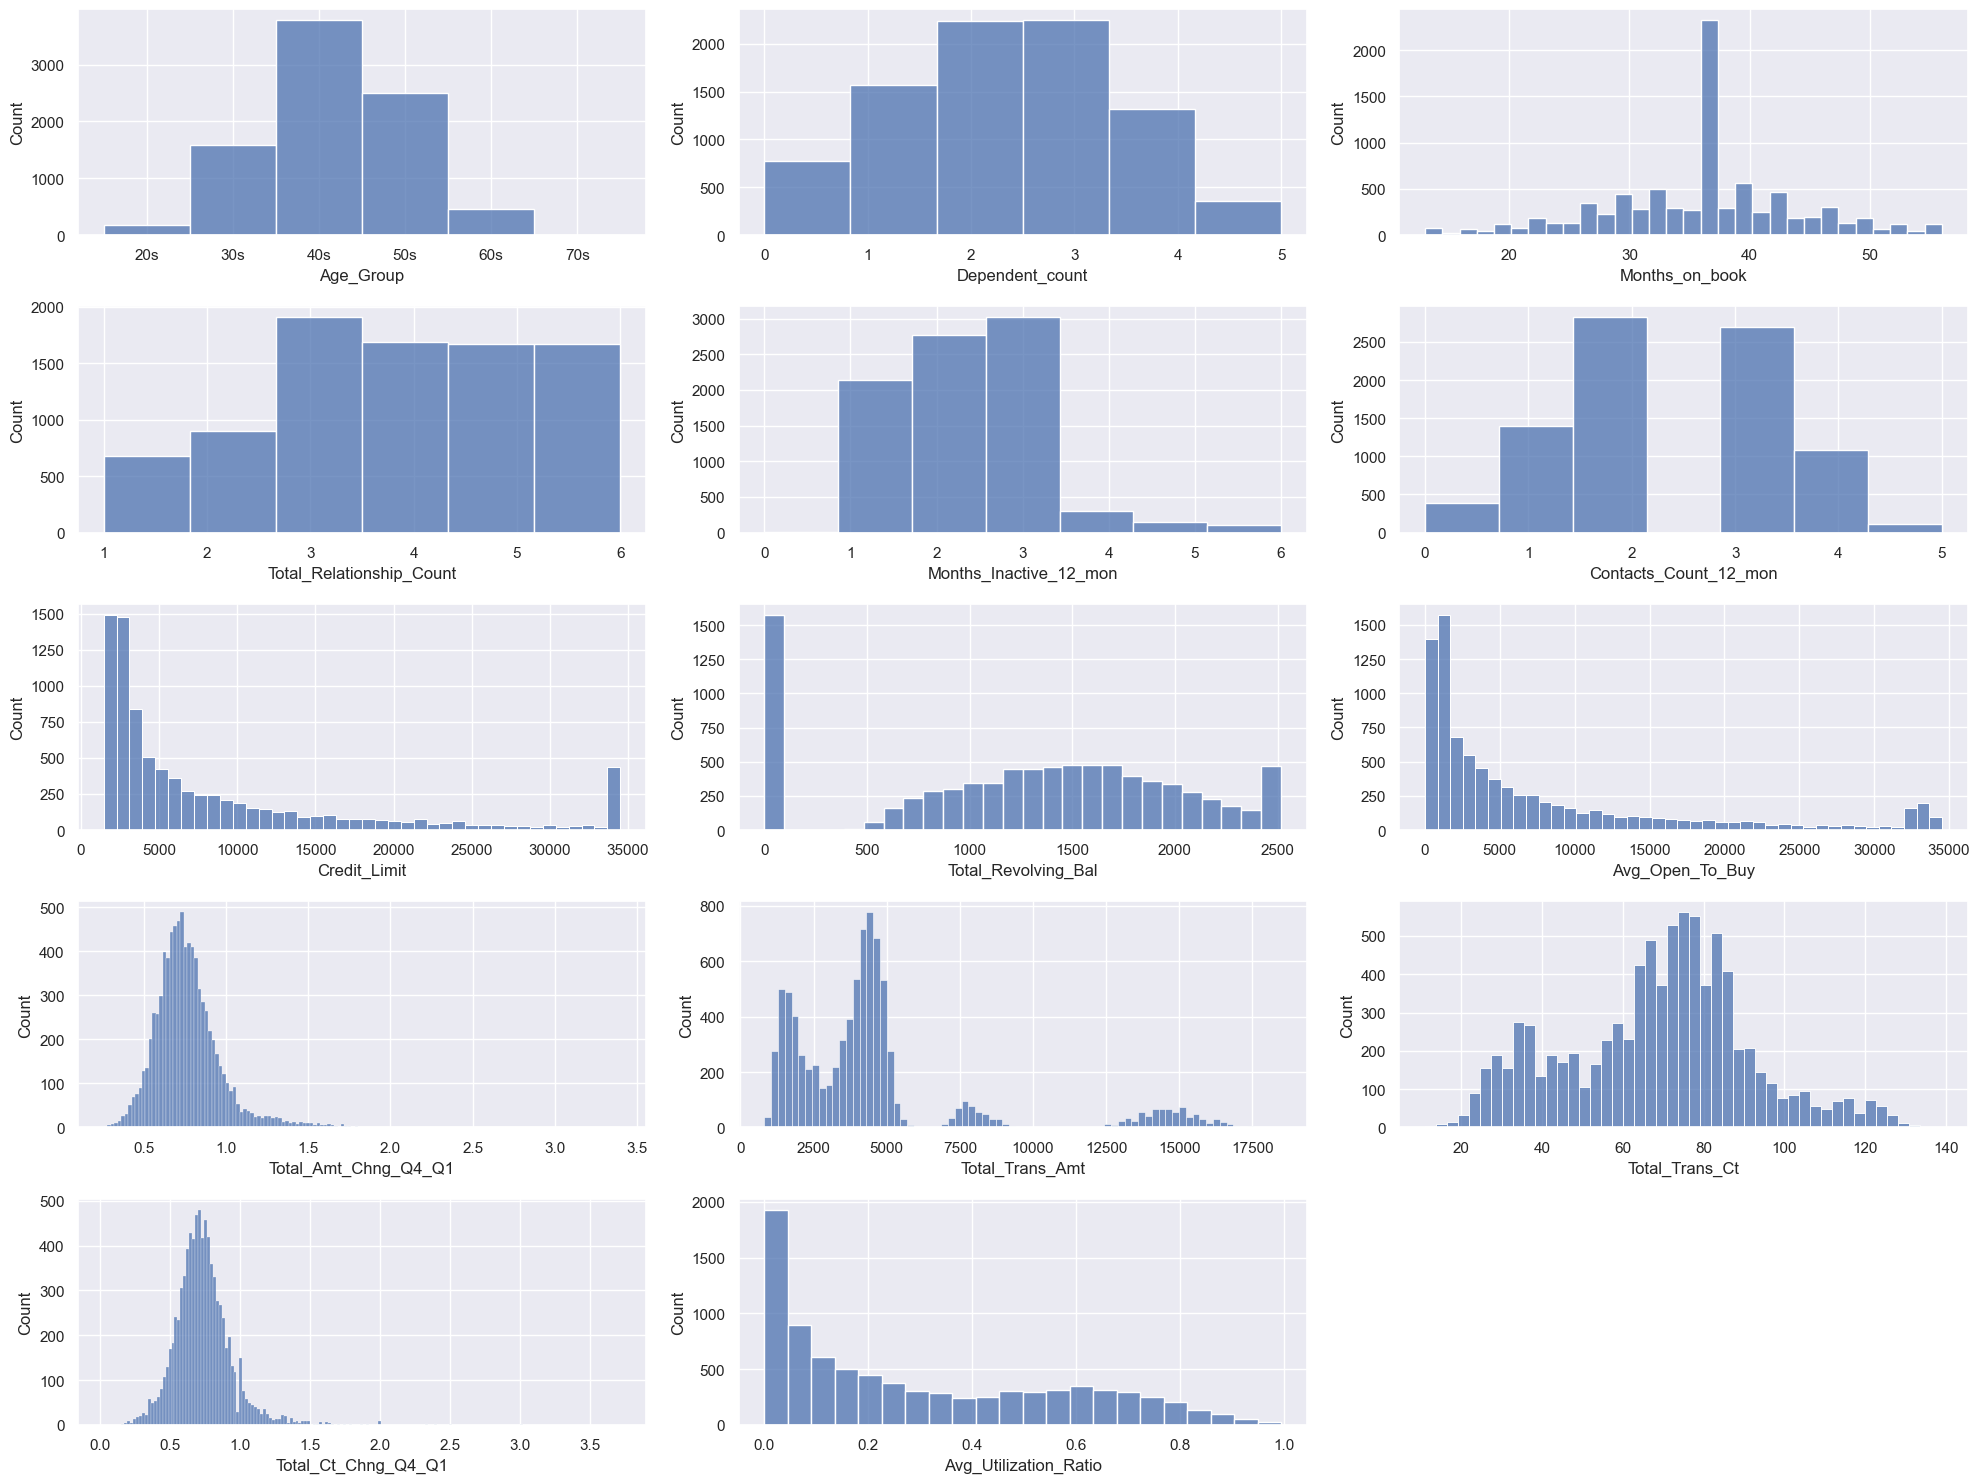

In [7]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
customer['Age_Group'] = pd.cut(customer['Customer_Age'], bins=bins, labels=labels, right=False)

f, axs = plt.subplots(5, 3, figsize=(20, 15))

sns.histplot(data=customer, x='Age_Group', ax=axs[0, 0], legend=True)
sns.histplot(data=customer, x='Dependent_count', bins=6, ax=axs[0, 1], legend=False)
sns.histplot(data=customer, x='Months_on_book', bins=30, ax=axs[0, 2], legend=False)
sns.histplot(data=customer, x='Total_Relationship_Count', bins=6, ax=axs[1, 0], legend=False)
sns.histplot(data=customer, x='Months_Inactive_12_mon', bins=7, ax=axs[1, 1], legend=False)
sns.histplot(data=customer, x='Contacts_Count_12_mon', bins=7, ax=axs[1, 2], legend=False)
sns.histplot(data=customer, x='Credit_Limit', ax=axs[2, 0], legend=False)
sns.histplot(data=customer, x='Total_Revolving_Bal', ax=axs[2, 1], legend=False)
sns.histplot(data=customer, x='Avg_Open_To_Buy', ax=axs[2, 2], legend=False)
sns.histplot(data=customer, x='Total_Amt_Chng_Q4_Q1', ax=axs[3, 0], legend=False)
sns.histplot(data=customer, x='Total_Trans_Amt', ax=axs[3, 1], legend=False)
sns.histplot(data=customer, x='Total_Trans_Ct', ax=axs[3, 2], legend=False)
sns.histplot(data=customer, x='Total_Ct_Chng_Q4_Q1', ax=axs[4, 0], legend=False)
sns.histplot(data=customer, x='Avg_Utilization_Ratio', ax=axs[4, 1], legend=False)

axs[4, 2].remove()

plt.tight_layout()

In [8]:
categorical_features = [
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

for feature in categorical_features:
    df = pd.DataFrame([
    customer.groupby(feature).size(),
    (customer.groupby(feature).size() / len(customer) * 100).round(2)
    ], 
    index=['Count', 'Percentage']).T
    print(df)

                    Count  Percentage
Attrition_Flag                       
Existing Customer  8500.0       100.0
         Count  Percentage
Gender                    
F       4428.0       52.09
M       4072.0       47.91
                  Count  Percentage
Education_Level                    
College           859.0       10.11
Doctorate         356.0        4.19
Graduate         2641.0       31.07
High School      1707.0       20.08
Post-Graduate     424.0        4.99
Uneducated       1250.0       14.71
Unknown          1263.0       14.86
                 Count  Percentage
Marital_Status                    
Divorced         627.0        7.38
Married         3978.0       46.80
Single          3275.0       38.53
Unknown          620.0        7.29
                  Count  Percentage
Income_Category                    
$120K +           601.0        7.07
$40K - $60K      1519.0       17.87
$60K - $80K      1213.0       14.27
$80K - $120K     1293.0       15.21
Less than $40K   2949.0     

In [9]:
selected_features = [
    'Customer_Age',
    'Credit_Limit',
    'Total_Trans_Amt',
    'Total_Revolving_Bal',
    'Gender',
    'Income_Category',
    'Card_Category'
]

selected_customer = customer[selected_features].copy()

selected_customer = pd.get_dummies(selected_customer, columns=['Gender', 'Income_Category', 'Card_Category'], drop_first=True)

from sklearn.preprocessing import StandardScaler

for feature in selected_features:
    if feature in numerical_features:
        scaler = StandardScaler()
        selected_customer[feature] = scaler.fit_transform(selected_customer[[feature]])

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(selected_customer)


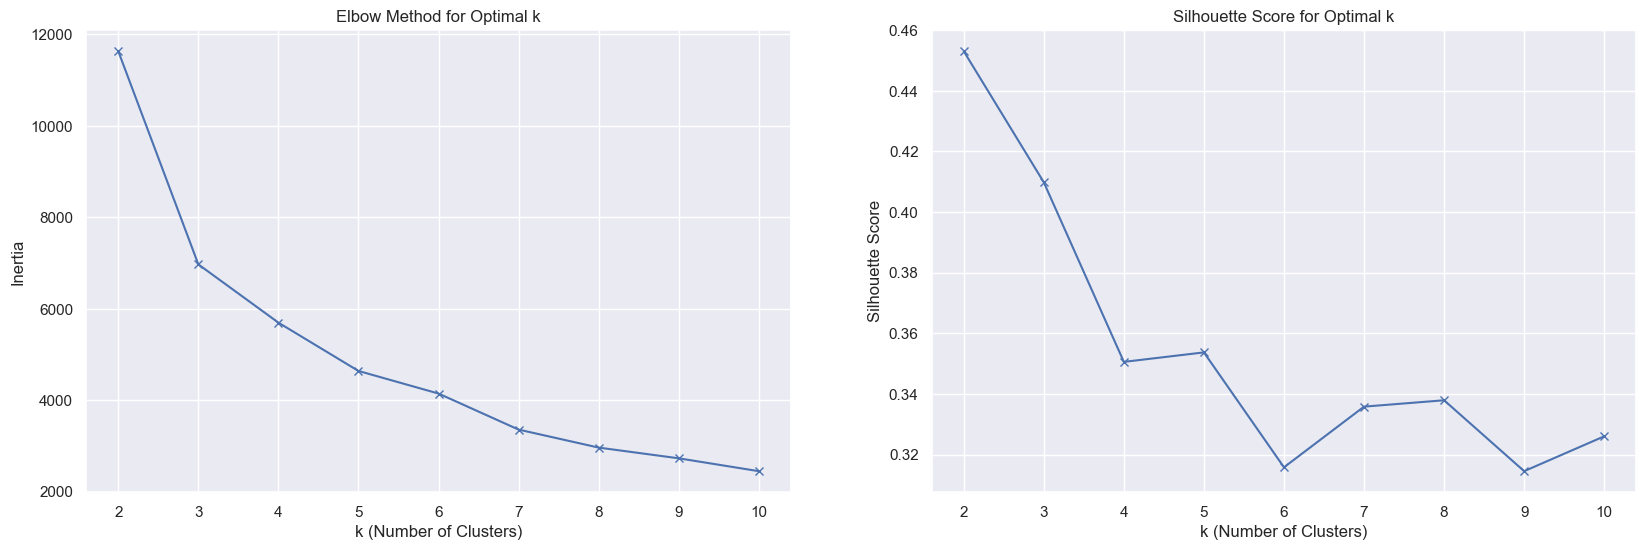

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertias.append(kmeans.inertia_)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    silhouette_scores.append(silhouette_score(pca_result, kmeans.labels_))

f, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].plot(k_range, inertias, 'bx-')
axs[0].set_xlabel('k (Number of Clusters)')
axs[0].set_ylabel('Inertia')
axs[0].set_title('Elbow Method for Optimal k')
axs[0].grid(True)

axs[1].plot(k_range, silhouette_scores, 'bx-')
axs[1].set_xlabel('k (Number of Clusters)')
axs[1].set_ylabel('Silhouette Score')
axs[1].set_title('Silhouette Score for Optimal k')
axs[1].grid(True)

plt.show()

In [11]:
differences = np.diff(inertias)
differences_r = differences[1:] / differences[:-1]
elbow_point = np.argmin(differences_r) + 2

print(f"Suggested optimal number of clusters (elbow point): {elbow_point}")

Suggested optimal number of clusters (elbow point): 2


In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result)

selected_customer['Cluster'] = kmeans.labels_

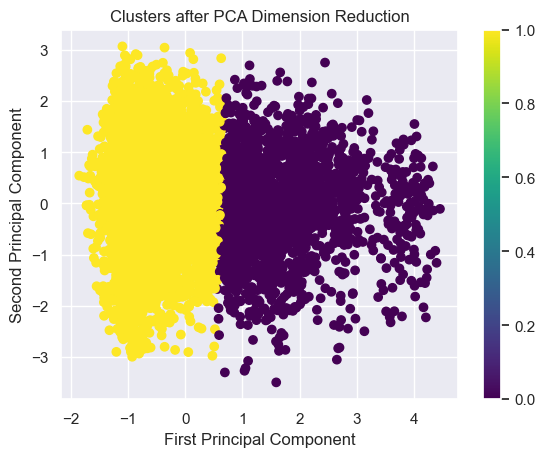

In [13]:
plt.figure()
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters after PCA Dimension Reduction')
plt.colorbar(scatter)
plt.show()

In [14]:
result = pd.merge(customer[selected_features], selected_customer['Cluster'], left_index=True, right_index=True)
result['Cluster'] = np.where(result['Cluster'] == 0, 'Cluster 0', 'Cluster 1')
result = result.sort_values('Cluster')

In [15]:
result.groupby('Cluster').size() / len(result) * 100

Cluster
Cluster 0    22.894118
Cluster 1    77.105882
dtype: float64

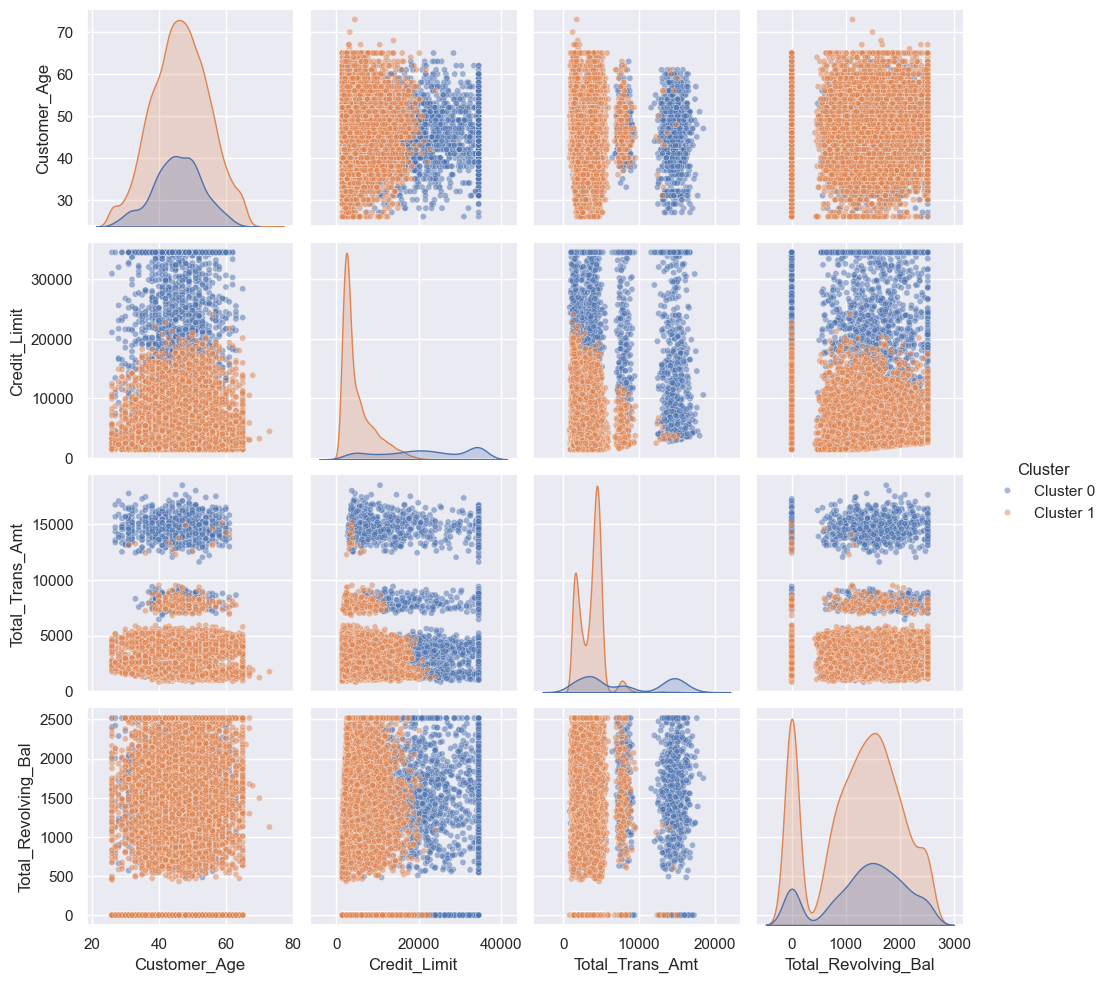

In [16]:
sns.pairplot(
    result[[
    'Customer_Age',
    'Credit_Limit',
    'Total_Trans_Amt',
    'Total_Revolving_Bal',
    'Cluster'
    ]], hue='Cluster', plot_kws={'alpha': 0.5, 's': 20})

<Axes: xlabel='Cluster', ylabel='Count'>

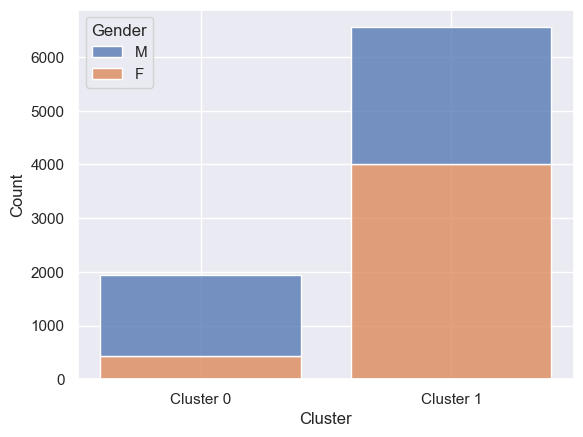

In [17]:
sns.histplot(
    data=result, 
    x='Cluster',
    hue='Gender',
    multiple='stack',
    bins=2,
    shrink=0.8
)

<Axes: xlabel='Cluster', ylabel='Count'>

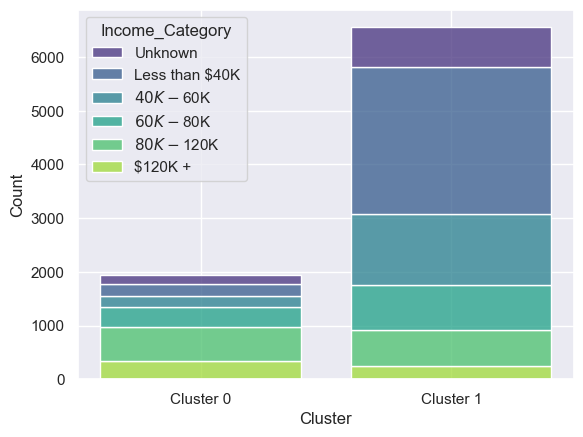

In [18]:
income_order = [
    'Unknown',
    'Less than $40K',
    '$40K - $60K',
    '$60K - $80K',
    '$80K - $120K',
    '$120K +'
]

sns.histplot(
    data=result, 
    x='Cluster',
    hue='Income_Category',
    hue_order=income_order,
    multiple='stack',
    bins=3,
    palette='viridis',
    shrink=0.8
)

<Axes: xlabel='Cluster', ylabel='Count'>

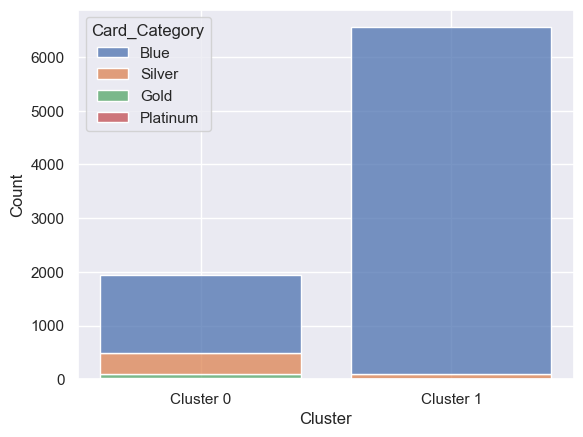

In [19]:
sns.histplot(
    data=result, 
    x='Cluster',
    hue='Card_Category',
    multiple='stack',
    bins=2,
    shrink=0.8
)